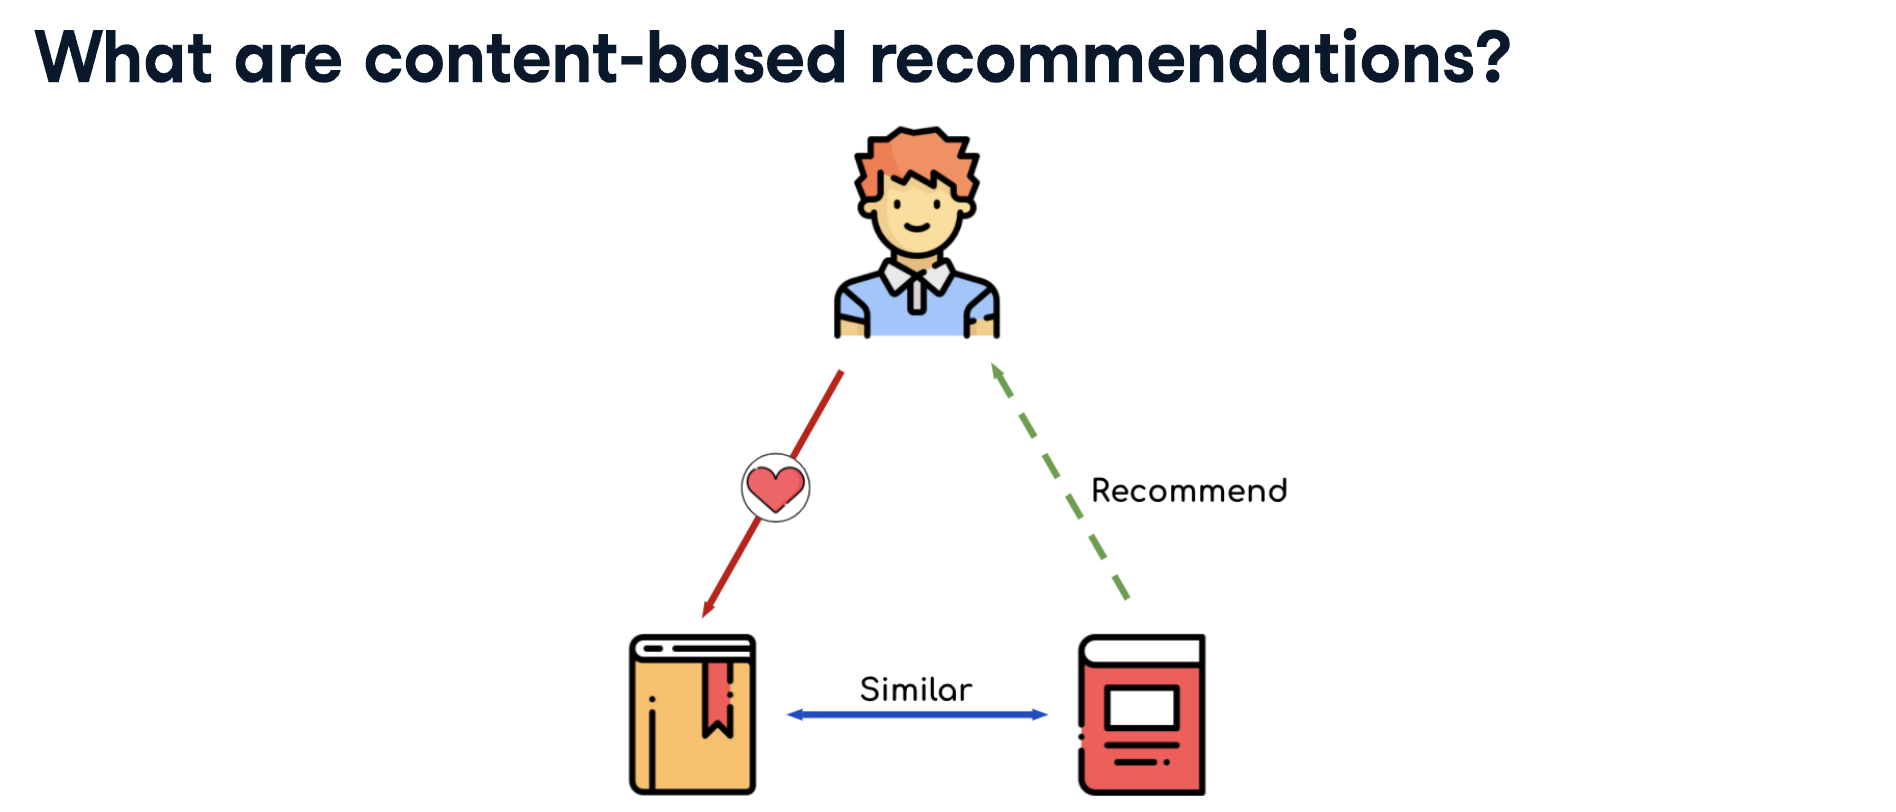

In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("./data/movies.csv").set_index("title")
df.head()

,movieId,genres
title,,
Toy Story (1995),1,Adventure|Animation|Children|Comedy|Fantasy
Jumanji (1995),2,Adventure|Children|Fantasy
Grumpier Old Men (1995),3,Comedy|Romance
Waiting to Exhale (1995),4,Comedy|Drama|Romance
Father of the Bride Part II (1995),5,Comedy


It seams that the data in this form would be difficult to manupulate so we split and explode the genres column

In [9]:
df1=df.genres.str.split("|").explode().to_frame()
df1

,genres
title,
Toy Story (1995),Adventure
Toy Story (1995),Animation
Toy Story (1995),Children
Toy Story (1995),Comedy
Toy Story (1995),Fantasy
...,...
No Game No Life: Zero (2017),Fantasy
Flint (2017),Drama
Bungo Stray Dogs: Dead Apple (2018),Action


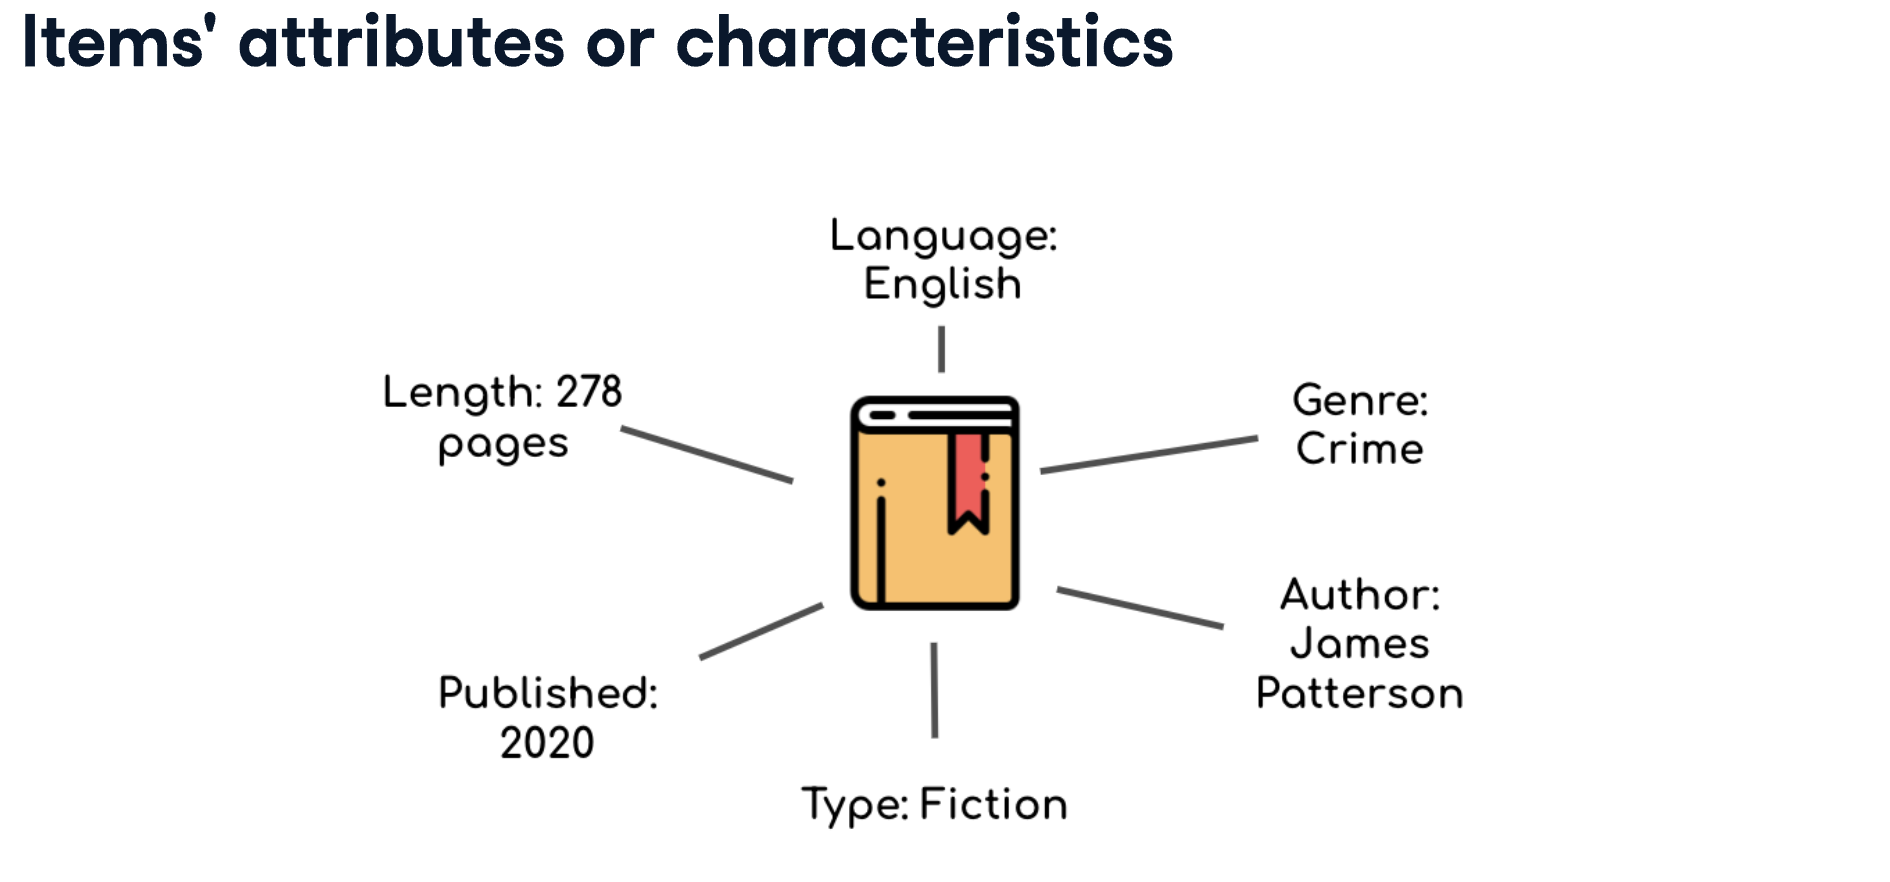

In [22]:
df1=pd.crosstab(df1.index, df1.genres)

In [23]:
df1.head()

genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
row_0,,,,,,,,,,,,,,,,,,,,
'71 (2014),0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
'Hellboy': The Seeds of Creation (2004),0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
'Round Midnight (1986),0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
'Salem's Lot (2004),0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
'Til There Was You (1997),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [30]:
df1.shape

(9737, 20)

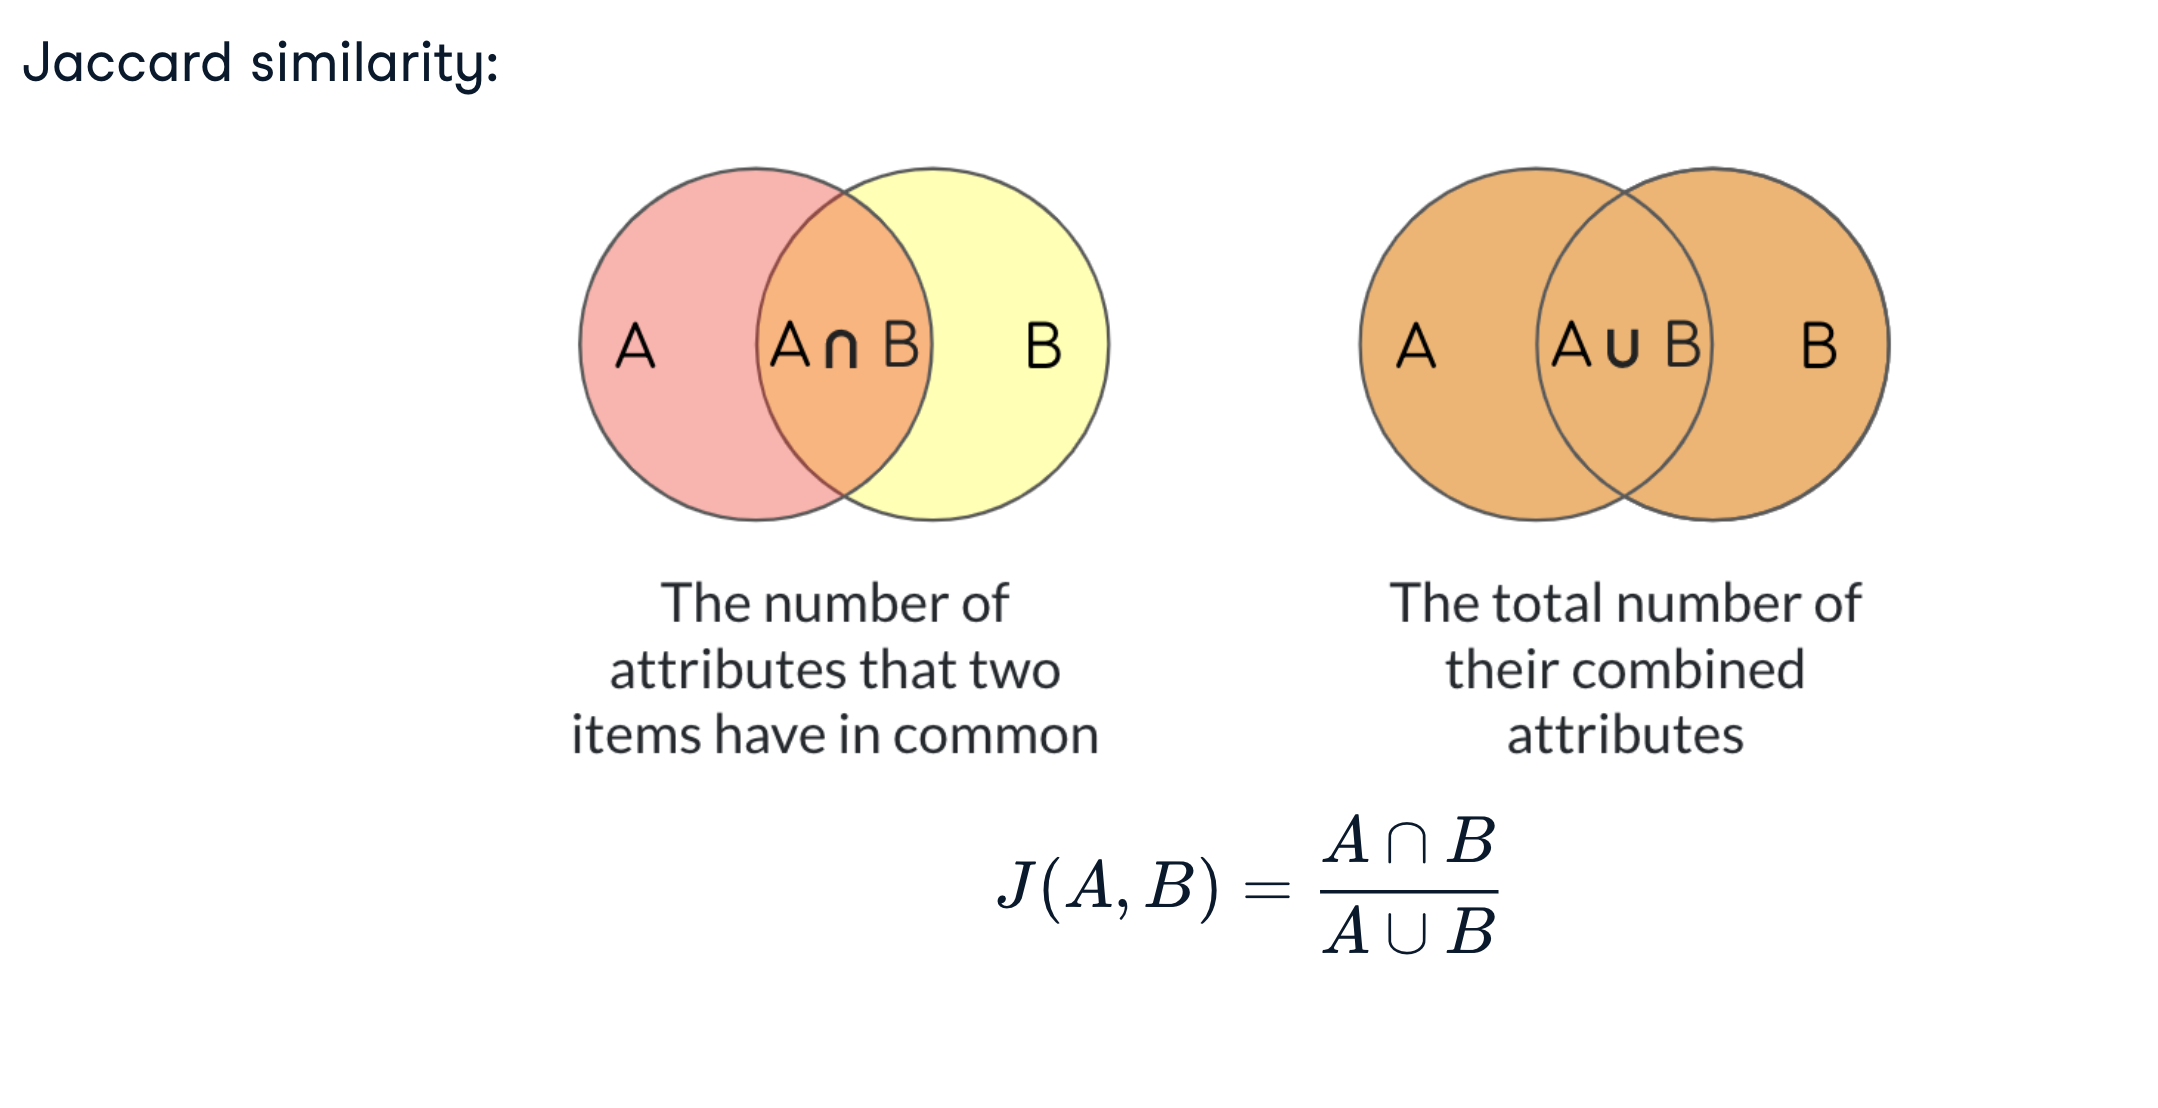

In [18]:
from sklearn.metrics import jaccard_score

from scipy.spatial.distance import pdist, squareform

In [25]:
jaccard_distances = pdist(df1.values, metric='jaccard')
jaccard_distances

array([0.875     , 0.8       , 0.66666667, ..., 1.        , 1.        ,
       0.66666667])

In [29]:
square_jaccard_distances =squareform(jaccard_distances)
print(square_jaccard_distances)


[[0.         0.875      0.8        ... 0.6        1.         1.        ]
 [0.875      0.         1.         ... 0.85714286 0.83333333 0.83333333]
 [0.8        1.         0.         ... 1.         1.         0.66666667]
 ...
 [0.6        0.85714286 1.         ... 0.         1.         1.        ]
 [1.         0.83333333 1.         ... 1.         0.         0.66666667]
 [1.         0.83333333 0.66666667 ... 1.         0.66666667 0.        ]]


In [31]:
square_jaccard_distances.shape

(9737, 9737)

In [33]:
similarity=pd.DataFrame(1-square_jaccard_distances, index=df1.index, columns=df1.index)
similarity.head()

row_0,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
row_0,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.000000,0.125,0.200000,0.333333,0.200000,0.0,0.0,0.25,0.166667,0.000000,...,0.40,0.40,0.2,0.2,0.200000,0.400000,0.400000,0.400000,0.000000,0.000000
'Hellboy': The Seeds of Creation (2004),0.125000,1.000,0.000000,0.000000,0.000000,0.0,0.2,0.00,0.142857,0.285714,...,0.00,0.00,0.0,0.0,0.000000,0.142857,0.142857,0.142857,0.166667,0.166667
'Round Midnight (1986),0.200000,0.000,1.000000,0.200000,0.333333,0.0,0.0,0.50,0.250000,0.000000,...,0.25,0.25,0.0,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333
'Salem's Lot (2004),0.333333,0.000,0.200000,1.000000,0.200000,0.0,0.0,0.25,0.166667,0.000000,...,0.40,0.75,0.5,0.5,0.200000,0.166667,0.166667,0.166667,0.000000,0.000000
'Til There Was You (1997),0.200000,0.000,0.333333,0.200000,1.000000,0.5,0.0,0.50,0.666667,0.000000,...,0.25,0.25,0.0,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000


then, if someone says that likes a movie we can search for the most simmilar movies

Let's say someone says that liked Toy Story, then we'll search for the most simmilar movies in the similartiy matrix

In [37]:
df.iloc[0]#.Name

movieId                                              1
genres     Adventure|Animation|Children|Comedy|Fantasy
Name: Toy Story (1995), dtype: object

In [40]:
similarity["Toy Story (1995)"].sort_values(ascending=False)

row_0
Tale of Despereaux, The (2008)               1.0
Wild, The (2006)                             1.0
Toy Story (1995)                             1.0
Toy Story 2 (1999)                           1.0
Emperor's New Groove, The (2000)             1.0
                                            ... 
Monument Ave. (1998)                         0.0
Conjuring, The (2013)                        0.0
Connections (1978)                           0.0
Conquest of the Planet of the Apes (1972)    0.0
'71 (2014)                                   0.0
Name: Toy Story (1995), Length: 9737, dtype: float64